499
526


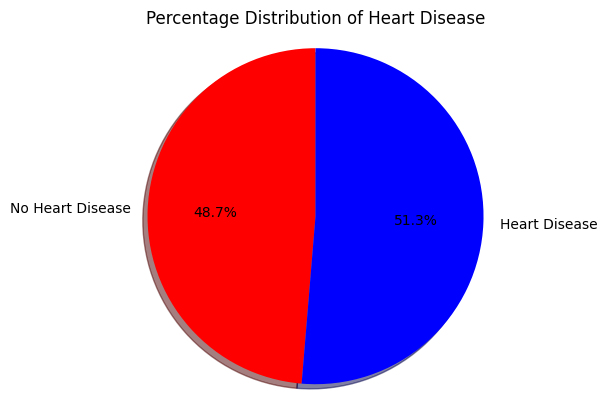

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#loading in Dataset
Hearts_data = pd.read_csv("heart.csv")

#Hearts_data.head()

#define Inputs and target variables

disease_factors = Hearts_data.drop(["target"], axis = 1)

X = disease_factors
y = Hearts_data["target"]

#Creating Heatmap to describe data
#plt.figure(figsize=(25, 20))
#sns.heatmap(data =disease_factors.corr(), annot=True)

counts = Hearts_data["target"].value_counts()

zero_counts = counts[0]
one_counts = counts[1]

print(zero_counts)
print(one_counts)

#Creating Pie Chart
labels = 'No Heart Disease', 'Heart Disease'
sizes = [499/1025, 526/1025]
colors = ['Red', 'Blue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("Percentage Distribution of Heart Disease")

plt.show()


In [ ]:
#Support Vector Machine Classification of heart disease prediction
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

#Import scaler and fit
scaler = MinMaxScaler()
scaler.fit(X_train)

#Transform to X_train

X_train_Scaled = scaler.transform(X_train)

#Assigning the model and fitting, purposley overfit for cross validation
SV_classification = SVC(kernel='rbf', C=100)
SV_classification.fit(X_train_Scaled, y_train)

X_test_scaled = scaler.transform(X_test)

print("Training set score: {:.2f}".format(SV_classification.score(X_train_Scaled, y_train)))
print("Test set score: {:.2f}".format(SV_classification.score(X_test_scaled, y_test)))



Training set score: 1.00
Test set score: 1.00


Training set score: 0.97
Test set score: 0.95


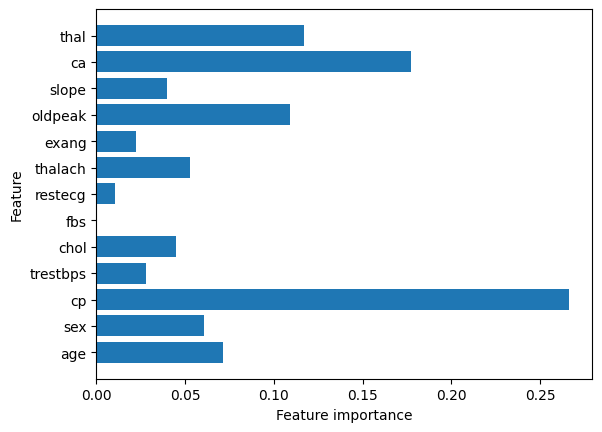

In [3]:
#Gradient Boosting Classification
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import numpy as np

#Importing the model and fitting Training data to model
GB_classifier=GradientBoostingClassifier(n_estimators=50)
GB_classifier.fit(X_train, y_train)

#Testing and Training Accuracy
print("Training set score: {:.2f}".format(GB_classifier.score(X_train, y_train)))
print("Test set score: {:.2f}".format(GB_classifier.score(X_test, y_test)))

#Feature importance

def plot_feature_importance(model):
    n_features = disease_factors.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), disease_factors)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)


plot_feature_importance(GB_classifier)



Training set score: 0.93
Test set score: 0.93


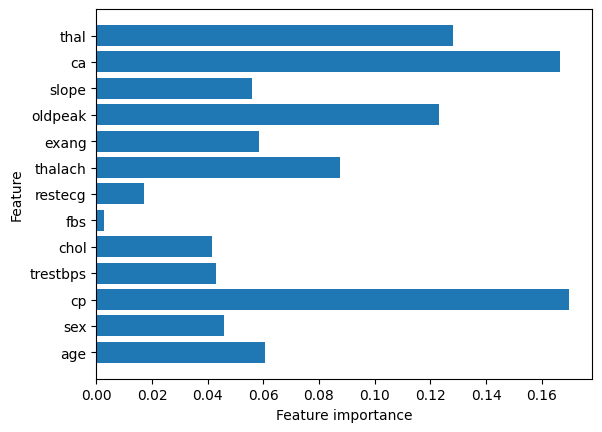

In [4]:
#Random Forest (Decision Tree Classifier)
from sklearn.ensemble import RandomForestClassifier

#Importing and fitting the training data to the model
RF_classifier = RandomForestClassifier(n_estimators=100, max_depth=5)
RF_classifier.fit(X_train, y_train)

#Accuracy Score
print("Training set score: {:.2f}".format(RF_classifier.score(X_train, y_train)))
print("Test set score: {:.2f}".format(RF_classifier.score(X_test, y_test)))

#Feature Importance
plot_feature_importance(RF_classifier)




Training set score: 1.00
Test set score: 1.00


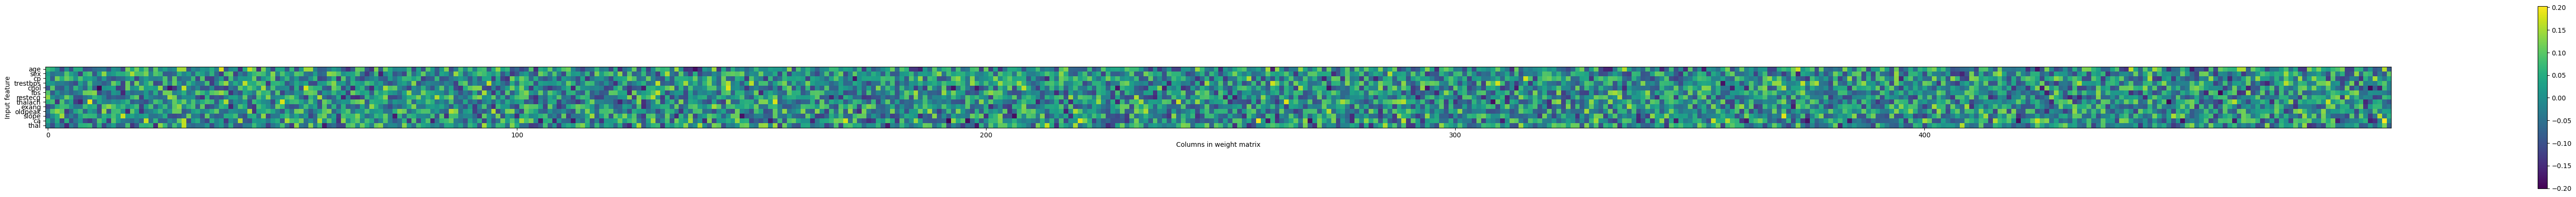

In [ ]:
#Multilayer Perception Classifier
from sklearn.neural_network import MLPClassifier

#Preprocessing the data using mean and std deviation
Mean_on_training = X_train.mean(axis=0)
Std_on_train = X_train.std(axis=0)

#Scaling X_train data
X_train_Scaled_MLP = (X_train - Mean_on_training) / Std_on_train
X_test_scaled_MLP = (X_test - Mean_on_training) / Std_on_train

#Calling and fitting the model
MLP_classifier = MLPClassifier(activation='relu', hidden_layer_sizes=(500, 500), max_iter=1000)
MLP_classifier.fit(X_train_Scaled_MLP, y_train)

#Scoring Model Accuracy, Purposley overfit for cross validation
print("Training set score: {:.2f}".format(MLP_classifier.score(X_train_Scaled_MLP, y_train)))
print("Test set score: {:.2f}".format(MLP_classifier.score(X_test_scaled_MLP, y_test)))

#Visualization
plt.figure(figsize=(80, 5))
plt.imshow(MLP_classifier.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(13), X)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()




In [6]:
#Cross validation for SVM classification

#Importing the needed models
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

#Cross validation for SVM Classification
scoring = ['accuracy', 'precision', 'recall', 'roc_auc', 'f1']
K_Fold = StratifiedKFold(n_splits=10)
SVM_CV = cross_validate(SV_classification, X, y, cv=K_Fold, scoring=scoring)
SVM_CV_df = pd.DataFrame(SVM_CV)
display(SVM_CV_df)
display(SVM_CV_df.mean())
display(SVM_CV_df.std())



,fit_time,score_time,test_accuracy,test_precision,test_recall,test_roc_auc,test_f1
0,0.033908,0.018986,0.825243,0.769231,0.943396,0.926792,0.847458
1,0.028920,0.016955,0.873786,0.812500,0.981132,0.929057,0.888889
2,0.026929,0.017944,0.844660,0.824561,0.886792,0.938491,0.854545
3,0.028890,0.016954,0.815534,0.765625,0.924528,0.902642,0.837607
4,0.027925,0.017952,0.834951,0.764706,0.981132,0.890189,0.859504
5,0.029919,0.017952,0.862745,0.806452,0.961538,0.936923,0.877193
6,0.027928,0.018948,0.725490,0.676471,0.884615,0.831154,0.766667
7,0.027925,0.016955,0.813725,0.789474,0.865385,0.882308,0.825688
8,0.029920,0.016955,0.696078,0.647887,0.884615,0.863462,0.747967
9,0.027925,0.016955,0.803922,0.779661,0.867925,0.851367,0.821429


fit_time          0.029019
score_time        0.017656
test_accuracy     0.809614
test_precision    0.763657
test_recall       0.918106
test_roc_auc      0.895238
test_f1           0.832695
dtype: float64

fit_time          0.001963
score_time        0.000827
test_accuracy     0.056869
test_precision    0.057628
test_recall       0.045987
test_roc_auc      0.038059
test_f1           0.045081
dtype: float64

In [7]:
#Cross validation for Gradient Boosting classification

K_Fold = StratifiedKFold(n_splits=10)
G_Boost_CV = cross_validate(GB_classifier, X, y, cv=K_Fold, scoring=scoring)
G_boost_CV_df = pd.DataFrame(G_Boost_CV)
display(G_boost_CV_df)
display(G_boost_CV_df.mean())
display(G_boost_CV_df.std())

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_roc_auc,test_f1
0,0.080813,0.007975,0.941748,0.927273,0.962264,0.987170,0.944444
1,0.077766,0.008004,0.990291,0.981481,1.000000,0.997736,0.990654
2,0.077799,0.006976,0.980583,0.963636,1.000000,0.999245,0.981481
3,0.079750,0.006980,0.941748,0.927273,0.962264,0.986415,0.944444
4,0.086877,0.007978,0.932039,0.910714,0.962264,0.941887,0.935780
5,0.079786,0.006983,0.970588,0.962264,0.980769,0.996538,0.971429
6,0.078792,0.007944,0.892157,0.859649,0.942308,0.971538,0.899083
7,0.079785,0.007590,0.950980,0.943396,0.961538,0.991154,0.952381
8,0.078755,0.007017,0.921569,0.879310,0.980769,0.982692,0.927273
9,0.078792,0.006979,0.921569,0.959184,0.886792,0.972661,0.921569


fit_time          0.079892
score_time        0.007443
test_accuracy     0.944327
test_precision    0.931418
test_recall       0.963897
test_roc_auc      0.982704
test_f1           0.946854
dtype: float64

fit_time          0.002631
score_time        0.000494
test_accuracy     0.029969
test_precision    0.039072
test_recall       0.032662
test_roc_auc      0.017281
test_f1           0.028267
dtype: float64

In [8]:
#Cross validation for Random Forest Classifier

K_Fold = StratifiedKFold(n_splits=10)
RF_cv = cross_validate(RF_classifier, X, y, cv=K_Fold, scoring=scoring)
RF_cv_df = pd.DataFrame(RF_cv)
display(RF_cv_df)
display(RF_cv_df.mean())
display(RF_cv_df.std())

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_roc_auc,test_f1
0,0.139626,0.017977,0.922330,0.894737,0.962264,0.984151,0.927273
1,0.132734,0.018950,0.990291,0.981481,1.000000,0.999623,0.990654
2,0.131648,0.017950,0.941748,0.912281,0.981132,0.996226,0.945455
3,0.131649,0.017951,0.902913,0.877193,0.943396,0.984151,0.909091
4,0.130694,0.016946,0.932039,0.883333,1.000000,0.952830,0.938053
5,0.128834,0.017985,0.960784,0.944444,0.980769,0.996538,0.962264
6,0.128659,0.016953,0.901961,0.888889,0.923077,0.963077,0.905660
7,0.131650,0.017950,0.921569,0.892857,0.961538,0.982308,0.925926
8,0.130649,0.017953,0.901961,0.850000,0.980769,0.964231,0.910714
9,0.128657,0.017919,0.892157,0.903846,0.886792,0.963034,0.895238


fit_time          0.131480
score_time        0.017853
test_accuracy     0.926775
test_precision    0.902906
test_recall       0.961974
test_roc_auc      0.978617
test_f1           0.931033
dtype: float64

fit_time          0.003201
score_time        0.000569
test_accuracy     0.030712
test_precision    0.036812
test_recall       0.035709
test_roc_auc      0.016679
test_f1           0.029149
dtype: float64

In [9]:
#Cross Validation for MLP Classifier

K_Fold = StratifiedKFold(n_splits=10)
mlp_cv = cross_validate(MLP_classifier, X, y, cv=K_Fold, scoring=scoring)
mlp_cv_df = pd.DataFrame(mlp_cv)
display(mlp_cv_df)
display(mlp_cv_df.mean())
display(mlp_cv_df.std())

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_roc_auc,test_f1
0,4.350729,0.011305,0.864078,0.882353,0.849057,0.946792,0.865385
1,3.219686,0.010349,0.796117,0.944444,0.641509,0.960377,0.764045
2,4.852975,0.010268,0.873786,0.844828,0.924528,0.957736,0.882883
3,3.842461,0.009950,0.708738,0.638554,1.000000,0.921132,0.779412
4,6.801140,0.011116,0.776699,0.916667,0.622642,0.932830,0.741573
5,3.036300,0.009862,0.784314,0.708333,0.980769,0.958462,0.822581
6,3.408776,0.009909,0.794118,0.738462,0.923077,0.881154,0.820513
7,5.902633,0.009804,0.823529,0.793103,0.884615,0.915000,0.836364
8,4.732746,0.009862,0.754902,0.701493,0.903846,0.867308,0.789916
9,4.990065,0.009860,0.784314,0.816327,0.754717,0.892568,0.784314


fit_time          4.513751
score_time        0.010229
test_accuracy     0.796059
test_precision    0.798456
test_recall       0.848476
test_roc_auc      0.923336
test_f1           0.808698
dtype: float64

fit_time          1.206772
score_time        0.000551
test_accuracy     0.048758
test_precision    0.100838
test_recall       0.132836
test_roc_auc      0.033943
test_f1           0.044869
dtype: float64